<h1> Initialize Boring Stuffs </h1> 

(42000, 784)


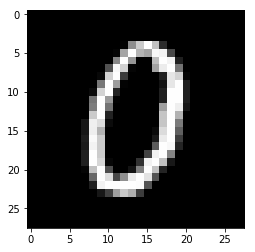

In [151]:
#import libraries and stuff
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#import mnist from local directory
data = pd.read_csv('mnist/train.csv')

#data_target_split
y = np.array(data['label'])
X = np.array(data[data.columns[1:]])
X = X / 255

#image checking
print(X.shape)
first_sample = np.reshape(X[5], (28, 28))
plt.imshow(first_sample, cmap='gray')
plt.show()

<h1> Network Structure </h1>

In [192]:
#initialize the network

class Layer:
    def __init__(self, layer_parameter):
        if(layer_parameter[1]!='none'): 
            self.activations_for_this_layer = np.zeros(layer_parameter[0])
        self.number_of_nodes = layer_parameter[0]
        self.activation_function = layer_parameter[1]
        self.weights_from_previous_layer = layer_parameter[2]
        self.biases_for_this_layer = layer_parameter[3]
        
class NeuralNetwork:
    
    #constructor
    def __init__(self, network_parameter):
        self.number_of_hidden_layers = network_parameter[0]
        self.hidden_layer_size = network_parameter[1]
        self.output_size = network_parameter[2]
        self.layers = []
        
    #activation functions
    def ReLU(self, x):
        return np.maximum(x, 0)
    
    def sigmoid(self, x):
        return np.divide(1, np.add(1, np.exp(np.negative(x))))
    
    def softmax(self, x):
        exp = np.exp(x)
        if isinstance(x[0], np.ndarray):
            return exp/np.sum(exp, axis=1, keepdims=True)
        else:
            return exp/np.sum(exp, keepdims=True)
    
    #def calculate_loss 
    #def mini_batch_gradient_descent()
    #def back_propagation
    #def performance_measurement
    
    #network structure define
    def structure_define(self, nn):
            #create input layer
            input_layer = Layer([784, 'none', [], []])
            nn.layers.append(input_layer)

            #create hidden layer 1
            np.random.seed(1)
            hidden_layer_1_weights = np.random.randn(784, 16)
            hidden_layer_1_biases = np.random.randn(16, 1)
            hidden_layer_1 = Layer([16, 'ReLU', hidden_layer_1_weights, hidden_layer_1_biases])
            nn.layers.append(hidden_layer_1)

            #create hidden layer 2
            np.random.seed(2)
            hidden_layer_2_weights = np.random.randn(16, 16)
            hidden_layer_2_biases = np.random.randn(16, 1)
            hidden_layer_2 = Layer([16, 'ReLU', hidden_layer_2_weights, hidden_layer_2_biases])
            nn.layers.append(hidden_layer_2)

            #create output layer
            np.random.seed(3)
            output_layer_weights = np.random.randn(16, 10)
            output_layer_biases = np.random.randn(10, 1)
            output_layer = Layer([10, 'ReLU', output_layer_weights, output_layer_biases])
            nn.layers.append(output_layer)
            
    def forward_propagation(self, sample_image):
        counter = 1
        for sample_image in X:
            counter = counter + 1
            sample_image = np.reshape(sample_image, (784, 1))
            hidden_layer_1.activations_for_this_layer = self.sigmoid(np.add(np.matmul(np.transpose(hidden_layer_1.\
                                                        weights_from_previous_layer),sample_image), \
                                                        hidden_layer_1.biases_for_this_layer))
            hidden_layer_2.activations_for_this_layer = self.sigmoid(np.add(np.matmul(np.transpose(hidden_layer_2.\
                                                        weights_from_previous_layer),\
                                                        hidden_layer_1.activations_for_this_layer), \
                                                        hidden_layer_2.biases_for_this_layer))
            output_layer.activations_for_this_layer   = self.sigmoid(np.add(np.matmul(np.transpose(output_layer.\
                                                        weights_from_previous_layer),\
                                                        hidden_layer_2.activations_for_this_layer), \
                                                        output_layer.biases_for_this_layer))
        print(counter, output_layer.activations_for_this_layer)

#initialize network
neural_net = NeuralNetwork([2, 16, 10])
neural_net.structure_define(neural_net)

#forward_propagation
neural_net.forward_propagation(X)

42001 [[0.04990874]
 [0.97291619]
 [0.60080002]
 [0.64677699]
 [0.98157337]
 [0.2503338 ]
 [0.32931869]
 [0.08767584]
 [0.00243202]
 [0.5043112 ]]
